# NeuroDetect - A Brain Tumor Detection System
***
##### Author: Mayur Bhai
##### Contact: mayurbhai2324@gmail.com
##### Date: Thursday, October 31th, 2024

## Table of Contents

1. [Introduction](#Introduction)
2. [Dataset](#Dataset)
    - [Data Exploration](#Data-Exploration)
    - [Data Preparation and Preprocessing](#Data-Preparation-and-Preprocessing)
    - [Displaying Sample Images](#Displaying-Sample-Images)
3. [Conclusion](#Conclusion)
4. [Next Steps](#Next-Steps)

## Introduction 
***
Brain tumours are common but challenging to detect, particularly in the early stages. Early detection and classification are crucial, helping medical professionals select effective treatment options and ultimately save lives. Distinguishing between tumour types—such as glioma, meningioma, and pituitary tumours—can be difficult even for skilled radiologists and surgeons. What if we could assist medical practitioners in identifying tumours faster, increasing patient turnaround and reducing costs? This project is inspired by that question. **Using machine learning, how can we identify tumours in MRI scans to improve early detection, prevent further complications, and accelerate treatment planning?**

The primary goal of this project is to build a machine learning model that can **accurately detect the presence of a tumour in an MRI image and identify the tumour type.** This model aims to enhance the efficiency and precision of brain tumour diagnosis, supporting radiologists, surgeons, and researchers by:
- Reduce diagnostic times
- Reduce time for treatment planning
- Increasing patient turnaround
- Minimizing costs linked to misdiagnoses and incorrect treatments

## Dataset 
***

For this project, we will be using a mix of image data from various data sources all bundled into one folder. The dataset is a combination of the three datasets: figshare, SARTAJ dataset and the Br35H dataset. The dataset was combined collected from __[Kaggle.](https://www.kaggle.com/datasets/masoudnickparvar/brain-tumor-mri-dataset)__ The dataset contains 7023 MRI images of brain tumours classified into glioma, meningioma, pituitary and non-tumor. Images are already sorted and arranged to train and test folders within the **Data** directory.

### Data Exploration
In this notebook, we will take a look at our data set to see what kind of image data we are working with, the distribution and begging to import the image data. As we are working with image data, there will be minimal/no Data Cleaning, Wrangling, or Advance EDA. This data source already comes with cleaned up images.

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
import os
import glob

#### Change Directory

First thing we'll do is to figure out where our current folder is located and change the directory so that it points to the folder with the image data. The os (Operating System) library will be used to determine that. We will set our base directory as the directory with the image data located.

In [2]:
# Check the current system directory
os.getcwd()

'C:\\Users\\Mayor\\Documents\\BrainStation Data Science\\Capstone Project\\capstone_template\\notebooks'

In [3]:
# Change directory so that it points to the folder with the data
os.chdir("C:/Users/Mayor/Documents/BrainStation Data Science/Capstone Project/capstone_template/data")
os.getcwd()

'C:\\Users\\Mayor\\Documents\\BrainStation Data Science\\Capstone Project\\capstone_template\\data'

In [4]:
# Set base directory to the data folder
base_dir = os.getcwd()


Define a function to prepare the dataset by taking a directory as input. This function will serve as the main tool to import image paths and labels from subfolders (without loading the actual images). By importing only paths and labels, we can efficiently examine and process the data without the overhead of loading all images. The image paths can later be used to load images as needed. The function returns lists of data paths and corresponding labels.

In [5]:
def prepare_dataset(directory):
    '''
    This function takes in the path of the data directory, go through all image path, subfolders and combine it into
    2 arrays. Each element in array is the path to the image and the image label.

    Args:
        directory (str): Directory path for the data directory
        
    Returns:
        data_path (array): Return array of each image data path
        data_labels (array): Return array of each image labels

    Examples:
        >>> path, label = prepare_dataset(directory)
        >>> path
        [data/train/dog_image_1.jpg, data/train/cat_image_1.jpg]
        >>> label
        [dog, cat]
    '''
    
    # Lists to store data path and labels
    data_path = []
    data_labels = []

    for label in os.listdir(directory):
        label_dir = os.path.join(directory, label)

        # Avoid MacOS storing path
        if not os.path.isdir(label_dir):
            continue

        # Going into each folder and getting image path
        for image in os.listdir(label_dir):
            image_path = os.path.join(label_dir, image)
            data_path.append(image_path)
            data_labels.append(label)

    return data_path, data_labels

#### Data Preparation and Preprocessing
Next, we'll begin loading and examining our data. First, we’ll set up the directory paths for both the training and test images. The dataset is structured so that images are already separated into their respective folders by class. To streamline data storage and facilitate quick exploratory data analysis (EDA), we’ll load each image path and its label into a data frame.

In [6]:
# Train and test directories
train_dir = base_dir + r'/Training/'
test_dir = base_dir + r'/Testing/'

# Getting data using above function
train_paths, train_labels = prepare_dataset(train_dir)
test_paths, test_labels = prepare_dataset(test_dir)

# Turn them into pandas DF
train_df = pd.DataFrame({'Class Path':train_paths, 'Class':train_labels})
test_df = pd.DataFrame({'Class Path':test_paths, 'Class':test_labels})

In [7]:
# Shape of data frame and sanity check
print(train_df.shape)
print(test_df.shape)

(5712, 2)
(1311, 2)


In [8]:
# Print train head
train_df.head()

,Class Path,Class
0,C:\Users\Mayor\Documents\BrainStation Data Sci...,glioma
1,C:\Users\Mayor\Documents\BrainStation Data Sci...,glioma
2,C:\Users\Mayor\Documents\BrainStation Data Sci...,glioma
3,C:\Users\Mayor\Documents\BrainStation Data Sci...,glioma
4,C:\Users\Mayor\Documents\BrainStation Data Sci...,glioma


In [9]:
# Print test head
test_df.head()

,Class Path,Class
0,C:\Users\Mayor\Documents\BrainStation Data Sci...,glioma
1,C:\Users\Mayor\Documents\BrainStation Data Sci...,glioma
2,C:\Users\Mayor\Documents\BrainStation Data Sci...,glioma
3,C:\Users\Mayor\Documents\BrainStation Data Sci...,glioma
4,C:\Users\Mayor\Documents\BrainStation Data Sci...,glioma


In [10]:
# Basic info of dataframe
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5712 entries, 0 to 5711
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Class Path  5712 non-null   object
 1   Class       5712 non-null   object
dtypes: object(2)
memory usage: 89.4+ KB


In [11]:
# Train df values
train_df['Class'].value_counts()

Class
notumor       1595
pituitary     1457
meningioma    1339
glioma        1321
Name: count, dtype: int64

In [12]:
# Test df values
test_df['Class'].value_counts()

Class
notumor       405
meningioma    306
glioma        300
pituitary     300
Name: count, dtype: int64

##### Observation:
At first glance, we observe that all columns contain string values, as expected. Examining the train data frame, we find an almost even distribution of images across each class. Specifically, the `notumor` class has the most images at 1,595, while the `glioma` class has the fewest at 1,321. The `pituitary` and `meningioma` classes contain 1,457 and 1,339 images, respectively. In the test data frame, `notumor` again has the highest count at 405 images, while both `glioma` and `pituitary` classes have 300 images each. Overall, our training and testing data are split approximately 80/20, with 80% allocated for training and 20% for testing.

Now let's visualize both data frames to better understand the image distribution across tumor classes.

<function matplotlib.pyplot.show(close=None, block=None)>

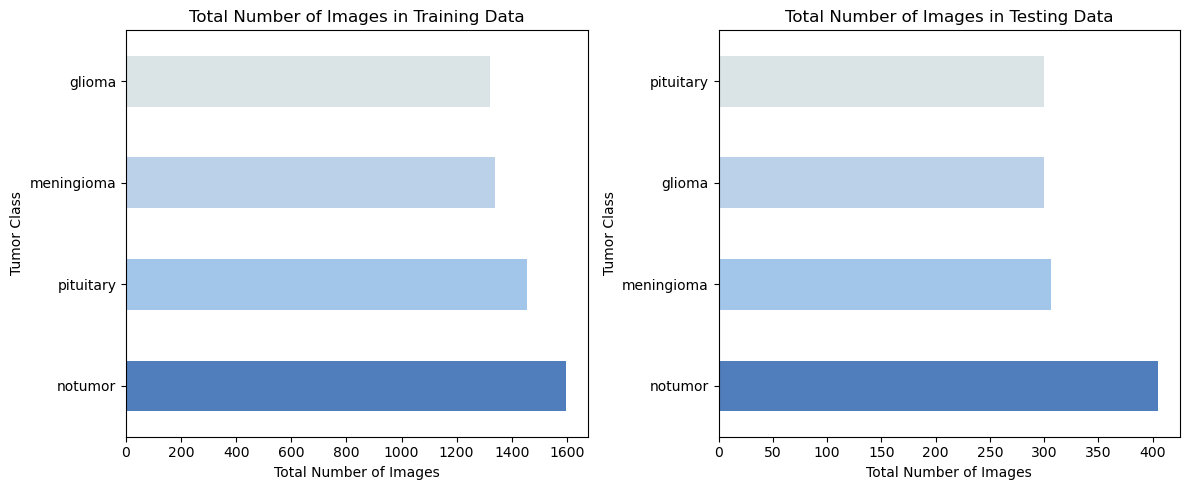

In [13]:
# create subplot of 1 row 2 coloumns
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# plot yearly sum on first axis
train_df['Class'].value_counts().plot(subplots = True, 
                                     kind = 'barh', 
                                     ax = axes[0],
                                     color = ['#507DBC', '#A1C6EA', '#BBD1EA', '#DAE3E5'],
                                     xlabel = 'Total Number of Images',
                                     ylabel = 'Tumor Class')

# set title for first graph
axes[0].set_title('Total Number of Images in Training Data')

# plot monthly sum on second axis
test_df['Class'].value_counts().plot(subplots = True, 
                                      kind = 'barh', 
                                      ax = axes[1],
                                      color = ['#507DBC', '#A1C6EA', '#BBD1EA', '#DAE3E5'],
                                      xlabel = 'Total Number of Images',
                                      ylabel = 'Tumor Class')

# set title for second graph
axes[1].set_title('Total Number of Images in Testing Data')

plt.xticks(rotation = 0)
plt.tight_layout()
plt.show

##### Observation:
The graph above reveals that our image data distribution across classes is relatively even. This balance is crucial for building and training a robust model, as an uneven distribution could lead to one class influencing the model disproportionately. When a class has significantly more images, the model tends to learn that class better, potentially skewing predictions. By training with an evenly distributed dataset, we minimize biases and ensure the model is trained effectively across all categories, allowing it to generalize well without being influenced by outliers or dominant classes.

#### Displaying Sample Images
Let's start by displaying sample images from each class to get a visual sense of the dataset. Using the `matplotlib.image` library, we’ll load and display sample images from the data paths stored in our training and testing data frames.

In [14]:
# Load a glioma tumor image
glioma_image = mpimg.imread(train_df['Class Path'][1])
glioma_label = train_df['Class'][1]

# Load a meningioma image
meningioma_image = mpimg.imread(train_df['Class Path'][2000])
meningioma_label = train_df['Class'][2000]

# Load a notumor image
notumor_image = mpimg.imread(train_df['Class Path'][3500])
notumor_label = train_df['Class'][3500]

# Load a pituitary image
pituitary_image = mpimg.imread(train_df['Class Path'][5000])
pituitary_label = train_df['Class'][5000]

In [15]:
# Check dimension of each image
print("Glioma Image Dimension:", glioma_image.shape)
print("Meningioma Image Dimension:",meningioma_image.shape)
print("Notumor Image Dimension:",notumor_image.shape)
print("Pituitary Image Dimension:",pituitary_image.shape)

Glioma Image Dimension: (512, 512, 3)
Meningioma Image Dimension: (512, 512, 3)
Notumor Image Dimension: (213, 236, 3)
Pituitary Image Dimension: (512, 512, 3)


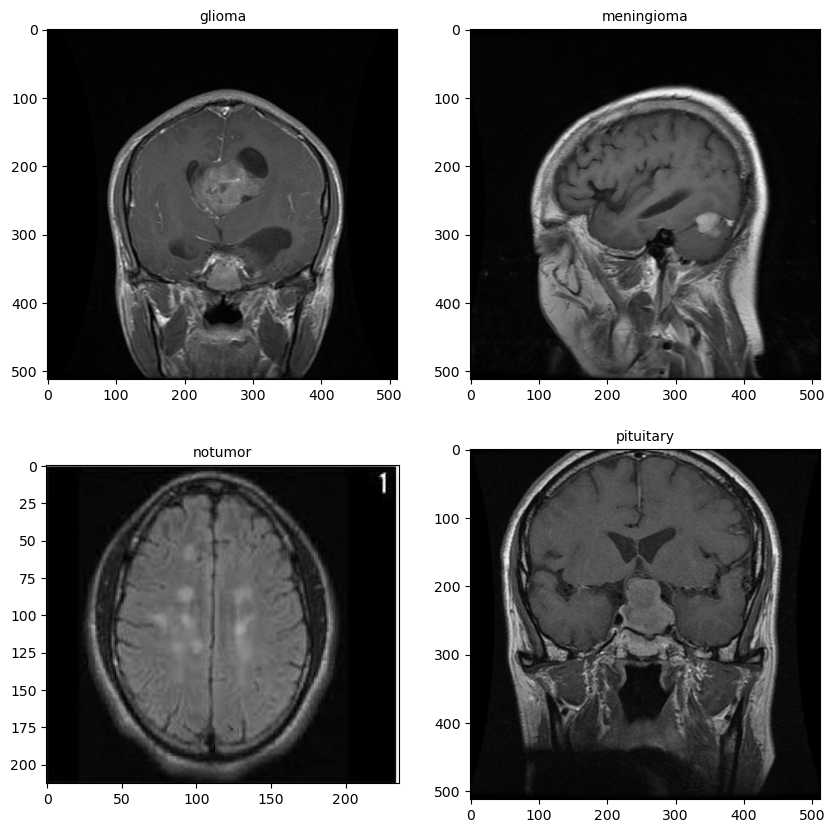

In [17]:
plt.figure(figsize=(10, 10))

# Plot glioma tumor
plt.subplot(2,2,1)
plt.imshow(glioma_image)
plt.title(glioma_label, fontsize = 10)

# Plot meningioma tumor
plt.subplot(2,2,2)
plt.imshow(meningioma_image)
plt.title(meningioma_label, fontsize = 10)

# Plot notumor tumor
plt.subplot(2,2,3)
plt.imshow(notumor_image)
plt.title(notumor_label, fontsize = 10)

# Plot pituitary tumor
plt.subplot(2,2,4)
plt.imshow(pituitary_image)
plt.title(pituitary_label, fontsize = 10)

plt.show()

##### Observation:
A quick look at the sample images reveals the types of MRI scans our model will process. Notably, the scans are taken from different angles and brain segments. For example, the sample images of glioma and pituitary tumours are taken from the back of the head, while the meningioma image is captured from the side, and the "no tumor" image is from the top.

Additionally, we observe variations in image dimensions. The "no tumor" image has a different size and resolution (213x236) compared to the other three images, which have a uniform resolution of (512x512).

These differences in imaging angle, size, and resolution are critical details to consider as we move forward. Understanding and addressing these variations will be essential to ensure model consistency and accuracy.

## Conclusion
***
In this initial exploration, we’ve confirmed that our MRI dataset is fairly balanced across classes but varies in imaging angles, dimensions, and resolutions. These factors could influence model training, as differing size and resolutions may introduce variability. Addressing these variations will be important to ensure that our model can generalize well and accurately identify and classify tumours in diverse scenarios.

## Next Steps 
***
Moving forward, the next phase of our project will focus on image preprocessing. Key preprocessing tasks will include first standardize the image dimensions by resizing all images to a consistent resolution. This will help with consistency during our model training. Another step will be normalizing pixel values. We may also consider techniques like possibly flattening, clustering, grey scale or Gaussian blur to ensure our model generalizes well across different image perspectives and tumour classes. 